# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

/Users/crakeee/MDST/MDST-Tutorial/Optional Challenges/Statistics Focus/orders.csv
count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64
Median Order Value: 284.0
Average Item Value: 387.7428


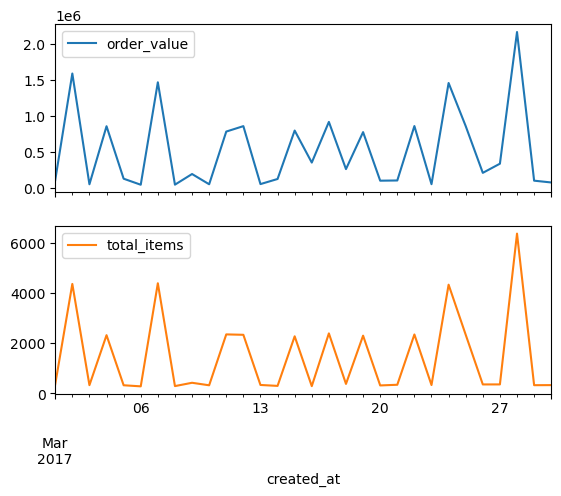

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
import os
file_name = "orders.csv"
abs_path = os.path.abspath(file_name)
print(abs_path)
orders = pd.read_csv('/Users/crakeee/MDST/MDST-Tutorial/Optional Challenges/Statistics Focus/orders.csv')

# Basic statistics
print(orders['order_value'].describe())

# New metrics calculation
orders['item_value'] = orders['order_value'] / orders['total_items']
print("Median Order Value:", orders['order_value'].median())
print("Average Item Value:", orders['item_value'].mean())

# Date parsing and trend analysis
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders.set_index('created_at', inplace=True)
daily_orders = orders.resample('D').sum()

# Plotting
daily_orders[['order_value', 'total_items']].plot(subplots=True)
plt.show()
